In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
dataset = pd.read_excel('C:/globalterrorismdb.xlsx')

In [44]:
# Let's take a glimpse at the dataset
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(53), int64(24), object(57)
memory usage: 175.5+ MB


In [46]:
# The categorization of our variables is as follows: float64(53), int64(24), object(57).
# Next I would like to find out whether we have missing values
missing = dataset.isnull().sum().sort_values(ascending = False)
print(missing)

gsubname3           170337
weapsubtype4_txt    170279
weapsubtype4        170279
weaptype4           170276
weaptype4_txt       170276
claimmode3          170230
claimmode3_txt      170230
gsubname2           170201
claim3              170087
guncertain3         170085
gname3              170081
divert              170037
attacktype3         169976
attacktype3_txt     169976
ransomnote          169879
ransompaidus        169863
ransomamtus         169854
claimmode2          169818
claimmode2_txt      169818
ransompaid          169643
corp3               169466
targsubtype3        169389
targsubtype3_txt    169389
natlty3             169344
natlty3_txt         169344
target3             169317
targtype3           169316
targtype3_txt       169316
ransomamt           169071
weapsubtype3_txt    168843
                     ...  
region                   0
region_txt               0
imonth                   0
iday                     0
country                  0
INT_IDEO                 0
I

In [47]:
# Many columns have a lot of missing values. I will choose to drop all columns that 
# have more than 20% of their size empty. The size is about 170000, that is why I
# choose 30000
missing20 = missing[missing > 30000 ]
print(missing20)

gsubname3           170337
weapsubtype4_txt    170279
weapsubtype4        170279
weaptype4           170276
weaptype4_txt       170276
claimmode3          170230
claimmode3_txt      170230
gsubname2           170201
claim3              170087
guncertain3         170085
gname3              170081
divert              170037
attacktype3         169976
attacktype3_txt     169976
ransomnote          169879
ransompaidus        169863
ransomamtus         169854
claimmode2          169818
claimmode2_txt      169818
ransompaid          169643
corp3               169466
targsubtype3        169389
targsubtype3_txt    169389
natlty3             169344
natlty3_txt         169344
target3             169317
targtype3           169316
targtype3_txt       169316
ransomamt           169071
weapsubtype3_txt    168843
                     ...  
weaptype2_txt       158507
weaptype2           158507
nhostkidus          157913
nhostkid            157858
claimmode_txt       154102
claimmode           154102
r

In [48]:
# Next on, I will drop these 88 columns from the original dataset and create a new dataset 
# called dataset2
dataset2 = dataset.drop(missing20.index , axis = 1)

In [49]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Data columns (total 47 columns):
eventid             170350 non-null int64
iyear               170350 non-null int64
imonth              170350 non-null int64
iday                170350 non-null int64
extended            170350 non-null int64
country             170350 non-null int64
country_txt         170350 non-null object
region              170350 non-null int64
region_txt          170350 non-null object
provstate           155848 non-null object
city                169904 non-null object
latitude            165744 non-null float64
longitude           165744 non-null float64
specificity         170346 non-null float64
vicinity            170350 non-null int64
crit1               170350 non-null int64
crit2               170350 non-null int64
crit3               170350 non-null int64
doubtterr           170350 non-null int64
multiple            170350 non-null int64
success             170350 non-null int

In [50]:
# Now we are left with 47 columns. Let's explore it again
dataset2.isnull().sum().sort_values()


eventid                 0
success                 0
suicide                 0
attacktype1             0
INT_MISC                0
targtype1               0
targtype1_txt           0
multiple                0
gname                   0
weaptype1               0
weaptype1_txt           0
property                0
dbsource                0
INT_LOG                 0
INT_IDEO                0
individual              0
doubtterr               0
attacktype1_txt         0
crit2                   0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
crit3                   0
region_txt              0
INT_ANY                 0
crit1                   0
vicinity                0
specificity             4
ishostkid             178
guncertain1           379
city                  446
target1               634
natlty1              1394
natlty1_txt          1394
latitude    

In [51]:
# Still we have some missing values. What I choose to do is drop all rows with missing values
# and create dataset3
dataset3 = dataset2.dropna(axis = 0)

In [52]:
# Checking again for missing values
dataset3.isnull().sum()

eventid             0
iyear               0
imonth              0
iday                0
extended            0
country             0
country_txt         0
region              0
region_txt          0
provstate           0
city                0
latitude            0
longitude           0
specificity         0
vicinity            0
crit1               0
crit2               0
crit3               0
doubtterr           0
multiple            0
success             0
suicide             0
attacktype1         0
attacktype1_txt     0
targtype1           0
targtype1_txt       0
targsubtype1        0
targsubtype1_txt    0
target1             0
natlty1             0
natlty1_txt         0
gname               0
guncertain1         0
individual          0
weaptype1           0
weaptype1_txt       0
weapsubtype1        0
weapsubtype1_txt    0
nkill               0
nwound              0
property            0
ishostkid           0
dbsource            0
INT_LOG             0
INT_IDEO            0
INT_MISC  

In [53]:
# Now , our dataset has NO missing values. Looking at the variables left, and after having
# read the pdf with the analysis of each variable,  I will keep the following:
#'extended','country','region','provstate','city','specificity','vicinity','crit1',crit2',
#'crit3', 'multiple','success','suicide','attacktype1','targtype1','natlty1','guncertain1',
#'individual','weaptype1', 'nkill','nwound','property','ishostkid', 'gname'   

In [54]:
# Creating dataset4
dataset4 = dataset3[['extended','country','region','provstate','city','specificity','vicinity','crit1','crit2',
'crit3', 'multiple','success','suicide','attacktype1','targtype1','natlty1','guncertain1',
'individual','weaptype1', 'nkill','nwound','property','ishostkid', 'gname']] 

In [55]:
# Our target variable is 'gname'.Let's explore it a little bit more.
groups = dataset4['gname'].value_counts().sort_values(ascending = False)
print(groups.shape)

(2463,)


In [56]:
# There are 2463 different names of terrorist organisations..... Meaning that if we construct
# a  classifier, we must have 2463 different classes. That is a lot of classes
# My choice is to keep those terrorist organizations that have performed at least 100 attempts
# I will create a Series object with the groups that have more than 100 attacks
finalgroups = groups[groups>100]
finalgroups.shape
# We are left with the "top85" terrorist groups

(85,)

In [57]:










#

#################################################################################################################
################################################################################################################
#########apo edw kai katw exoume preprocessing gia ANN, to opoio den petyxe tpt, 57% akribeia###########




In [58]:
# Next on  I will create a dictionary, with the names of the groups, so that I can map
# my dataset, keeping those lines, where the gname column has elements of my dictionary
# meaning the names of the groups I chose. The names are the index of the finalgroups 
finalgroups.index

Index(['Unknown', 'Taliban', 'Shining Path (SL)',
       'Islamic State of Iraq and the Levant (ISIL)',
       'New People's Army (NPA)',
       'Revolutionary Armed Forces of Colombia (FARC)', 'Al-Shabaab',
       'Kurdistan Workers' Party (PKK)', 'Basque Fatherland and Freedom (ETA)',
       'Communist Party of India - Maoist (CPI-Maoist)', 'Boko Haram',
       'Irish Republican Army (IRA)',
       'Liberation Tigers of Tamil Eelam (LTTE)', 'Maoists',
       'Tehrik-i-Taliban Pakistan (TTP)',
       'National Liberation Army of Colombia (ELN)',
       'Al-Qaida in the Arabian Peninsula (AQAP)', 'Palestinians',
       'Manuel Rodriguez Patriotic Front (FPMR)', 'Al-Qaida in Iraq',
       'Sikh Extremists', 'Houthi extremists (Ansar Allah)',
       'Donetsk People's Republic',
       'Corsican National Liberation Front (FLNC)',
       'Tupac Amaru Revolutionary Movement (MRTA)', 'Separatists',
       'Muslim extremists', 'African National Congress (South Africa)',
       'Abu Sayyaf Gro

In [59]:
# I will just copy and paste everything, into the dictionary groupnames

groupnames = {'Unknown', 'Taliban', 'Shining Path (SL)',
       'Islamic State of Iraq and the Levant (ISIL)',
       'New People's Army (NPA)',
       'Revolutionary Armed Forces of Colombia (FARC)', 'Al-Shabaab',
       'Kurdistan Workers' Party (PKK)', 'Basque Fatherland and Freedom (ETA)',
       'Communist Party of India - Maoist (CPI-Maoist)', 'Boko Haram',
       'Irish Republican Army (IRA)',
       'Liberation Tigers of Tamil Eelam (LTTE)', 'Maoists',
       'Tehrik-i-Taliban Pakistan (TTP)',
       'National Liberation Army of Colombia (ELN)',
       'Al-Qaida in the Arabian Peninsula (AQAP)', 'Palestinians',
       'Manuel Rodriguez Patriotic Front (FPMR)', 'Al-Qaida in Iraq',
       'Sikh Extremists', 'Houthi extremists (Ansar Allah)',
       'Donetsk People's Republic',
       'Corsican National Liberation Front (FLNC)',
       'Tupac Amaru Revolutionary Movement (MRTA)', 'Separatists',
       'Muslim extremists', 'African National Congress (South Africa)',
       'Abu Sayyaf Group (ASG)', 'People's Liberation Front (JVP)',
       'Narco-Terrorists', 'Palestinian Extremists',
       'Hamas (Islamic Resistance Movement)',
       'National Union for the Total Independence of Angola (UNITA)',
       'M-19 (Movement of April 19)', 'Baloch Republican Army (BRA)',
       'Hezbollah', 'United Liberation Front of Assam (ULFA)',
       'Sinai Province of the Islamic State',
       'Bangsamoro Islamic Freedom Movement (BIFM)', 'Chechen Rebels',
       'Moro Islamic Liberation Front (MILF)', 'Gunmen',
       'Mozambique National Resistance Movement (MNR)',
       'Al-Qaida in the Islamic Maghreb (AQIM)', 'Dev Sol',
       'Fulani extremists', 'Anti-Abortion extremists',
       'First of October Antifascist Resistance Group (GRAPO)',
       'Left-Wing Militants', 'Popular Liberation Army (EPL)',
       'Luhansk People's Republic',
       'Salafist Group for Preaching and Fighting (GSPC)', 'Death Squad',
       'Simon Bolivar Guerrilla Coordinating Board (CGSB)',
       'Tripoli Province of the Islamic State', 'Baloch Liberation Army (BLA)',
       'Red Brigades', 'Palestinian Islamic Jihad (PIJ)',
       'Movement of the Revolutionary Left (MIR) (Chile)',
       'Hizbul Mujahideen (HM)', 'Baloch Liberation Front (BLF)',
       'Lashkar-e-Taiba (LeT)',
       'Farabundo Marti National Liberation Front (FMLN)',
       'Khorasan Chapter of the Islamic State', 'Al-Aqsa Martyrs Brigade',
       'Moro National Liberation Front (MNLF)',
       'National Democratic Front of Bodoland (NDFB)',
       'Garo National Liberation Army', 'Islamic State of Iraq (ISI)',
       'Runda Kumpulan Kecil (RKK)', 'Al-Nusrah Front',
       'Palestine Liberation Organization (PLO)', 'Lashkar-e-Jhangvi',
       'Tamils', 'Allied Democratic Forces (ADF)',
       'Armenian Secret Army for the Liberation of Armenia',
       'Lord's Resistance Army (LRA)', 'Muttahida Qami Movement (MQM)',
       'Barqa Province of the Islamic State',
       'November 17 Revolutionary Organization (N17RO)',
       'Popular Front for the Liberation of Palestine (PFLP)',
       'Corsican National Liberation Front- Historic Channel',
       'Muslim Militants', 'Armed Islamic Group (GIA)'}

SyntaxError: invalid syntax (<ipython-input-59-0c9f7592b6e0>, line 5)

In [ ]:
# There is a problem. Many names have the  " ' ", apostrophe , which "confuses" the 
# dictionary. I must manipulate the gname column. I will replace the apostrophe with
# a blank character
dataset4['gname'] = dataset4['gname'].str.replace("'", ' ')

In [ ]:
# Now, I will restart the whole process 
groups2 = dataset4['gname'].value_counts().sort_values(ascending = False)

In [ ]:
finalgroups2 = groups2[groups2>100]
print(finalgroups2)

In [ ]:
# We can see that, for example, New People's Army, fifth on the list, has been 
# transformed to New People s Army. So, I will use the index of finalgroups2
# and paste it into my dictionary:
finalgroups2.index

In [ ]:
groupnames = {'Unknown', 'Taliban', 'Shining Path (SL)',
       'Islamic State of Iraq and the Levant (ISIL)',
       'New People s Army (NPA)',
       'Revolutionary Armed Forces of Colombia (FARC)', 'Al-Shabaab',
       'Kurdistan Workers  Party (PKK)', 'Basque Fatherland and Freedom (ETA)',
       'Communist Party of India - Maoist (CPI-Maoist)', 'Boko Haram',
       'Irish Republican Army (IRA)',
       'Liberation Tigers of Tamil Eelam (LTTE)', 'Maoists',
       'Tehrik-i-Taliban Pakistan (TTP)',
       'National Liberation Army of Colombia (ELN)',
       'Al-Qaida in the Arabian Peninsula (AQAP)', 'Palestinians',
       'Manuel Rodriguez Patriotic Front (FPMR)', 'Al-Qaida in Iraq',
       'Sikh Extremists', 'Houthi extremists (Ansar Allah)',
       'Donetsk People s Republic',
       'Corsican National Liberation Front (FLNC)',
       'Tupac Amaru Revolutionary Movement (MRTA)', 'Separatists',
       'Muslim extremists', 'African National Congress (South Africa)',
       'Abu Sayyaf Group (ASG)', 'People s Liberation Front (JVP)',
       'Narco-Terrorists', 'Palestinian Extremists',
       'Hamas (Islamic Resistance Movement)',
       'National Union for the Total Independence of Angola (UNITA)',
       'M-19 (Movement of April 19)', 'Baloch Republican Army (BRA)',
       'Hezbollah', 'United Liberation Front of Assam (ULFA)',
       'Sinai Province of the Islamic State',
       'Bangsamoro Islamic Freedom Movement (BIFM)', 'Chechen Rebels',
       'Moro Islamic Liberation Front (MILF)', 'Gunmen',
       'Mozambique National Resistance Movement (MNR)',
       'Al-Qaida in the Islamic Maghreb (AQIM)', 'Dev Sol',
       'Fulani extremists', 'Anti-Abortion extremists',
       'First of October Antifascist Resistance Group (GRAPO)',
       'Popular Liberation Army (EPL)', 'Left-Wing Militants',
       'Salafist Group for Preaching and Fighting (GSPC)',
       'Luhansk People s Republic', 'Death Squad',
       'Simon Bolivar Guerrilla Coordinating Board (CGSB)',
       'Tripoli Province of the Islamic State', 'Baloch Liberation Army (BLA)',
       'Red Brigades', 'Palestinian Islamic Jihad (PIJ)',
       'Movement of the Revolutionary Left (MIR) (Chile)',
       'Hizbul Mujahideen (HM)', 'Baloch Liberation Front (BLF)',
       'Lashkar-e-Taiba (LeT)',
       'Farabundo Marti National Liberation Front (FMLN)',
       'Khorasan Chapter of the Islamic State', 'Al-Aqsa Martyrs Brigade',
       'Moro National Liberation Front (MNLF)',
       'National Democratic Front of Bodoland (NDFB)',
       'Garo National Liberation Army', 'Islamic State of Iraq (ISI)',
       'Runda Kumpulan Kecil (RKK)', 'Palestine Liberation Organization (PLO)',
       'Al-Nusrah Front', 'Lashkar-e-Jhangvi', 'Tamils',
       'Allied Democratic Forces (ADF)',
       'Armenian Secret Army for the Liberation of Armenia',
       'Lord s Resistance Army (LRA)', 'Muttahida Qami Movement (MQM)',
       'Barqa Province of the Islamic State',
       'November 17 Revolutionary Organization (N17RO)',
       'Corsican National Liberation Front- Historic Channel',
       'Popular Front for the Liberation of Palestine (PFLP)',
       'Muslim Militants', 'Armed Islamic Group (GIA)'}

In [ ]:
# Mapping of the dataset, as prementioned
dataset5 = dataset4.loc[dataset4['gname'].isin(groupnames)]

In [ ]:
dataset5.info()


In [ ]:
# After all these procedures, we have a dataset of 103375 rows and 24 columns.
# I will label my target variable, because it is a name, and call it newy
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
dataset5['newy'] = labelencoder.fit_transform(dataset5['gname'])

In [ ]:
# Ok, now that we have transformed our y variable, let's seeif there are any object columns
# that need transformation
text_cols = dataset5.select_dtypes(include=['object']).columns
print(text_cols)

In [ ]:
# gname, has already been labeled.I will also label city and provstate as I did with 
# the target variable
dataset5['newcity'] = labelencoder.fit_transform(dataset5['city'])
dataset5['newprovstate'] = labelencoder.fit_transform(dataset5['provstate'])

In [ ]:
# Next I will drop the original columns
dataset5 = dataset5.drop(['city', 'provstate'] ,axis = 1)

In [ ]:
# Next, for ease purposes I will add the newy column, as y2, at the end of our dataset
# and simultaneously drop both gname and newy
dataset5['y2'] = dataset5['newy']
dataset5 = dataset5.drop(['gname' , 'newy'] ,axis = 1)

In [ ]:
# Construction of features and target variable.
# Our x variable consists of the first 23 columns
X = dataset5.iloc[:, 0:23].values
y = dataset5.iloc[:, 23].values

In [ ]:
# Imputing any missing data, just in case
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis=0)
imputer = imputer.fit(X)
X = imputer.transform(X)

In [ ]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size=0.2, random_state = 0)

In [ ]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev1\\mingw64\\bin'


os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']


os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

import xgboost as xgb

In [ ]:
# I will test 4 classifiers, and see whic one performs better

from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(random_state = 42)
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state=42)
import xgboost as xgb
from xgboost import XGBClassifier
classifier3 = XGBClassifier(random_state = 42)
from sklearn.naive_bayes import GaussianNB
classifier4 = GaussianNB()
classifierslist = [classifier1, classifier2, classifier3, classifier4]
acclist = []


for classifier in classifierslist:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)  
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(y_test, y_pred)
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    from sklearn.metrics import classification_report
    clsfrprt = classification_report(y_test, y_pred)
    acclist.append(acc)
    print(cm)

In [84]:
print(acclist)

[0.76367593712212822, 0.62505441354292623, 0.77199516324062878, 0.26307134220072553]


In [83]:
# Looking at the accuracy list, we have achieved a 76.3 accuracy using the Random Forest
# and a 77,2 with XGB, I will select the Random Forest, and try to optimize
# two very common hyperparameters

accuracy = []
n_estimators = [20,50,75,100,200]
for i in n_estimators:
    classifier = RandomForestClassifier(random_state = 42 , n_estimators = i)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)  

In [85]:
print(accuracy)

[0.76740024183796851, 0.76967351874244261, 0.77359129383313185, 0.77533252720677148, 0.77484885126964931]


In [67]:
# We can see that there is an improvement , in comparison with the default
# 10 estimators, but it seems that it si declining, after the 100 estimators.
# So, I will keep the 100 estimators and will improve the next hyperparameter
# max leaf nodes
accuracy2 = []
trees = [500,1000,2000,5000,10000,20000]
for i in trees:
    classifier = RandomForestClassifier(random_state = 42 , n_estimators = 100, max_leaf_nodes= i)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(y_test, y_pred)
    accuracy2.append(acc) 


In [68]:
print(accuracy2)

[0.73770253929866991, 0.75400241837968562, 0.76778718258766632, 0.7811850060459492, 0.78892382103990322, 0.78099153567110036]


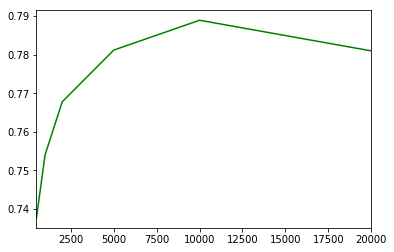

In [75]:
pd.Series(accuracy2, trees).plot(color = 'green')

In [87]:
# So our final form is 
classifier = RandomForestClassifier(random_state = 42 , n_estimators = 100, max_leaf_nodes= 10000)
# Let's run it and take a look at the classsification report
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)  
from sklearn.metrics import classification_report
clsfrprt = classification_report(y_test, y_pred)


C:\Users\tolaros\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [88]:
print(clsfrprt)

             precision    recall  f1-score   support

          0       0.78      0.51      0.62        71
          1       0.69      0.27      0.39        82
          2       0.20      0.08      0.11        26
          3       1.00      0.19      0.32        26
          4       0.59      0.28      0.38       106
          5       0.78      0.66      0.71       148
          6       0.88      0.15      0.25        48
          7       0.85      0.76      0.81       348
          8       0.86      0.75      0.80        16
          9       0.85      0.88      0.86        32
         10       0.60      0.47      0.53        19
         11       1.00      0.09      0.17        22
         12       0.75      0.10      0.18        29
         13       0.00      0.00      0.00        29
         14       0.64      0.16      0.25        44
         15       0.77      0.37      0.50        54
         16       0.67      0.19      0.30        21
         17       0.82      0.96      0.88   

In [90]:
# APPLYING K-FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
from sklearn   import metrics
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, scoring = 'accuracy')

In [91]:
print(accuracies.mean())
print(accuracies.std())

0.785021832274
0.00361458946162


In [ ]:
# Very good and solid results, with small variance